In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import numpy as np


In [2]:
#zips = pd.read_excel('ZIP_Locale_Detail.xls', dtype={'PHYSICAL ZIP': str})
project=pd.read_csv(r"C:\Users\baigd\Documents\MLPP personal\kddcup\Raw files\projects.csv")
donation = pd.read_csv(r"C:\Users\baigd\Documents\MLPP personal\kddcup\Raw files\donations.csv")
outcomes=pd.read_csv(r"C:\Users\baigd\Documents\MLPP personal\kddcup\Raw files\outcomes.csv")
#zips = zips[['PHYSICAL CITY', 'PHYSICAL STATE', 'PHYSICAL ZIP']]
#zips.head()

In [3]:
project.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [21]:
project_df=project
outcomes_df=outcomes
donation_df=donation


In [22]:
project.teacher_prefix.unique()

array(['Mrs.', 'Mr.', 'Ms.', nan, 'Dr.', 'Mr. & Mrs.'], dtype=object)

In [23]:
gender_mapping = {
    'Mrs.': 'Female',
    'Ms.': 'Female',
    'Mr.': 'Male',
    'Dr.': 'Unknown',
    'Mr. & Mrs.': 'Unknown'
}

# Create a new 'gender' column
project_df['gender'] = project_df['teacher_prefix'].map(gender_mapping)

# Handle NaN values
project_df['gender'] = project_df['gender'].fillna('Unknown')

# Drop rows with 'Unknown' gender
project_df = project_df[project_df['gender'] != 'Unknown']

# Assign 1 to 'Female' and 0 to 'Male'
project_df['gender'] = project_df['gender'].map({'Female': 1, 'Male': 0})

print(project_df)


C:\Users\baigd\AppData\Local\Temp\ipykernel_3228\845003042.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df['gender'] = project_df['gender'].map({'Female': 1, 'Male': 0})


                               projectid                    teacher_acctid  \
0       316ed8fb3b81402ff6ac8f721bb31192  42d43fa6f37314365d08692e08680973   
1       90de744e368a7e4883223ca49318ae30  864eb466462bf704bf7a16a585ef296a   
2       32943bb1063267de6ed19fc0ceb4b9a7  37f85135259ece793213aca9d8765542   
3       bb18f409abda2f264d5acda8cab577a9  2133fc46f951f1e7d60645b0f9e48a6c   
4       24761b686e18e5eace634607acbcc19f  867ff478a63f5457eaf41049536c47cd   
...                                  ...                               ...   
664093  a7236ea96c812895cafc5d700d779147  c4f90a541cb81e68cd7ad180309985ae   
664094  e02da37beb332eb66c2d2ba989c597ad  d95c94eea994274d614be50bddd89973   
664095  82e536f14eadf2671a70e03416f695a3  b00d2790934ce7487c99bc9d6e1d5d4d   
664096  e139df754a873a62d93daa56acbf8040  e5476c2ef97b33614445a17554535adc   
664097  77558a6eda151deee9a00553f7fccfc7  21abe0cd2a09a218888d2c4659c58f43   

                                schoolid  school_ncesid  school

In [24]:
#donations_cleaned['donor_zip'] = donations_cleaned['donor_zip'].astype(str)
#merged_df = donations_cleaned.merge(zips, left_on='donor_zip', right_on='PHYSICAL ZIP', how='left')

In [25]:
# only implement this to CA
#project_df=project_df[project_df["school_state"]=="CA"]

In [26]:
project_df.reset_index(drop=True, inplace=True)

In [27]:
donation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097989 entries, 0 to 3097988
Data columns (total 21 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   donationid                                object 
 1   projectid                                 object 
 2   donor_acctid                              object 
 3   donor_city                                object 
 4   donor_state                               object 
 5   donor_zip                                 float64
 6   is_teacher_acct                           object 
 7   donation_timestamp                        object 
 8   donation_to_project                       float64
 9   donation_optional_support                 float64
 10  donation_total                            float64
 11  dollar_amount                             object 
 12  donation_included_optional_support        object 
 13  payment_method                            object 
 14  pa

In [28]:
project_df['poverty_level'].value_counts()



poverty_level
highest poverty     383482
high poverty        173552
moderate poverty     90336
low poverty          16710
Name: count, dtype: int64

In [29]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619326 entries, 0 to 619325
Data columns (total 12 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   projectid                                       619326 non-null  object 
 1   is_exciting                                     619326 non-null  object 
 2   at_least_1_teacher_referred_donor               524928 non-null  object 
 3   fully_funded                                    619326 non-null  object 
 4   at_least_1_green_donation                       524928 non-null  object 
 5   great_chat                                      619326 non-null  object 
 6   three_or_more_non_teacher_referred_donors       524928 non-null  object 
 7   one_non_teacher_referred_donor_giving_100_plus  524928 non-null  object 
 8   donation_from_thoughtful_donor                  524928 non-null  object 
 9   great_messages_proportion 

In [30]:

#col =["projectid", "total_price_excluding_optional_support","date_posted", 'gender']
col =["projectid", "total_price_excluding_optional_support","date_posted", 'poverty_level', 'gender']
#project_df=project_df[project_df["poverty_level"]=="highest poverty"]
project_df=project_df[col]
project_df = pd.merge(project_df,outcomes_df[["projectid","fully_funded"]], on ="projectid", how ="left")
project_df["fully_funded"]=project_df.fully_funded.fillna('f')

In [43]:
# Total number of projects in the dataset (across all poverty levels)
total_projects = 383482 + 173552 + 90336 + 16710

# Total number of underfunded projects in the dataset
total_underfunded_projects = len(project_df[project_df["fully_funded"] == "f"])

# Proportion of all projects from highest poverty areas
proportion_highest_poverty_projects = 383482 / total_projects * 100

# Proportion of underfunded projects from highest poverty areas
underfunded_highest_poverty_projects = len(
    project_df[(project_df["poverty_level"] == "highest poverty") & (project_df["fully_funded"] == "f")]
)
proportion_underfunded_highest_poverty_projects = underfunded_highest_poverty_projects / total_underfunded_projects * 100

# Display the results
print(f"Total projects: {total_projects}")
print(f"Total underfunded projects: {total_underfunded_projects}")
print(f"Proportion of all projects from highest poverty areas: {proportion_highest_poverty_projects:.2f}%")
print(f"Proportion of underfunded projects from highest poverty areas: {proportion_underfunded_highest_poverty_projects:.2f}%")


Total projects: 664080
Total underfunded projects: 233409
Proportion of all projects from highest poverty areas: 57.75%
Proportion of underfunded projects from highest poverty areas: 52.79%


In [32]:
project_df["fully_funded"].value_counts()

fully_funded
t    430671
f    233409
Name: count, dtype: int64

In [33]:
project_df.head()

,projectid,total_price_excluding_optional_support,date_posted,poverty_level,gender,fully_funded
0,316ed8fb3b81402ff6ac8f721bb31192,555.81,2014-05-12,highest poverty,1,f
1,90de744e368a7e4883223ca49318ae30,296.47,2014-05-12,highest poverty,1,f
2,32943bb1063267de6ed19fc0ceb4b9a7,430.89,2014-05-11,high poverty,0,f
3,bb18f409abda2f264d5acda8cab577a9,576.07,2014-05-11,highest poverty,0,f
4,24761b686e18e5eace634607acbcc19f,408.40,2014-05-11,highest poverty,1,f


In [35]:
# Filter the dataset for underfunded projects
underfunded_projects = project_df[project_df["fully_funded"] == "f"]

# Count the number of underfunded projects by gender
gender_counts = underfunded_projects["gender"].value_counts()

# Calculate the proportion of underfunded projects by gender
gender_proportions = underfunded_projects["gender"].value_counts(normalize=True)

# Display the results
print("Counts of underfunded projects by gender:")
print(gender_counts)

print("\nProportions of underfunded projects by gender:")
print(gender_proportions)


Counts of underfunded projects by gender:
gender
1    205178
0     28231
Name: count, dtype: int64

Proportions of underfunded projects by gender:
gender
1    0.879049
0    0.120951
Name: proportion, dtype: float64


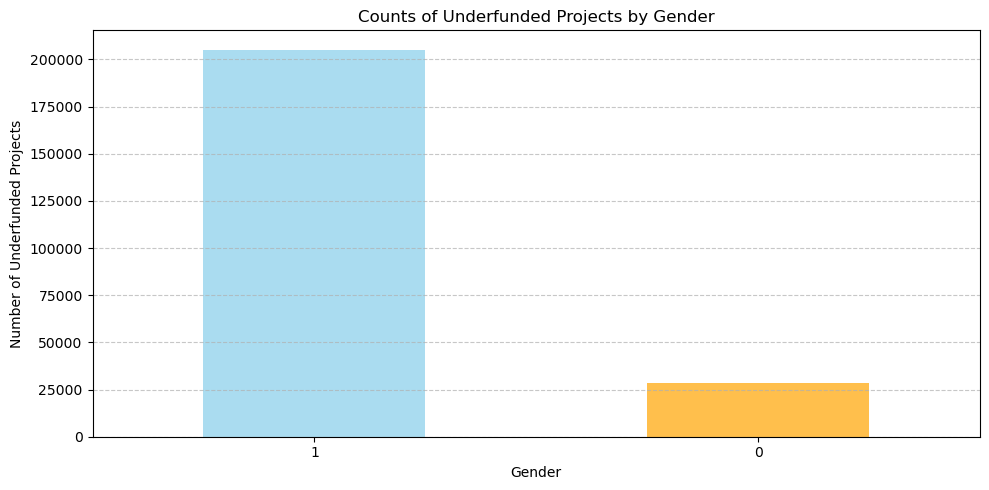

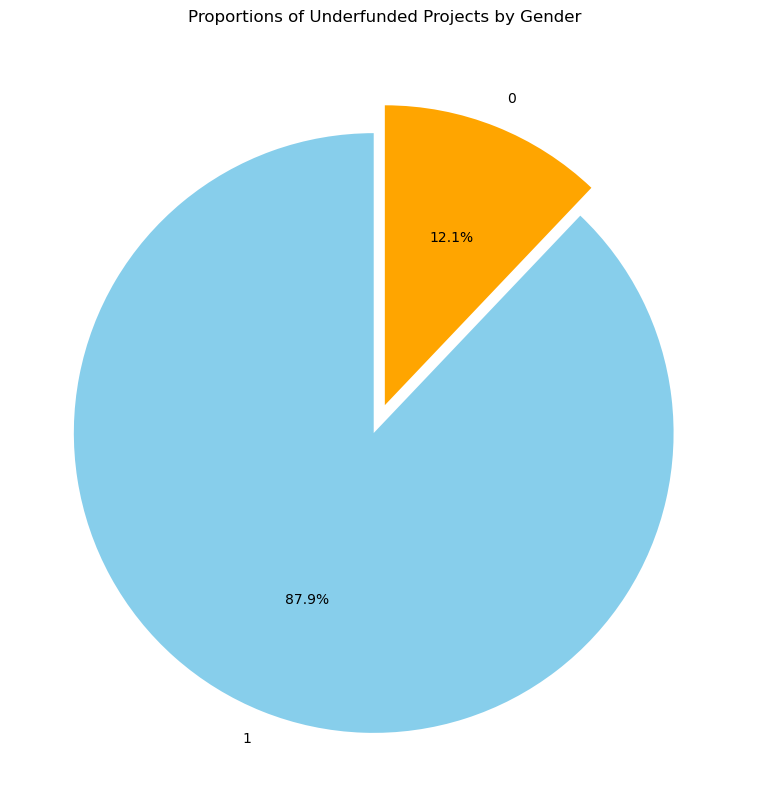

In [40]:
import matplotlib.pyplot as plt

# Bar Chart for Counts
plt.figure(figsize=(10, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.7)
plt.title('Counts of Underfunded Projects by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Underfunded Projects')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart for Proportions
plt.figure(figsize=(8, 8))
gender_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], explode=[0.1, 0])
plt.title('Proportions of Underfunded Projects by Gender')
plt.ylabel('')  # Hide the default y-label for the pie chart
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

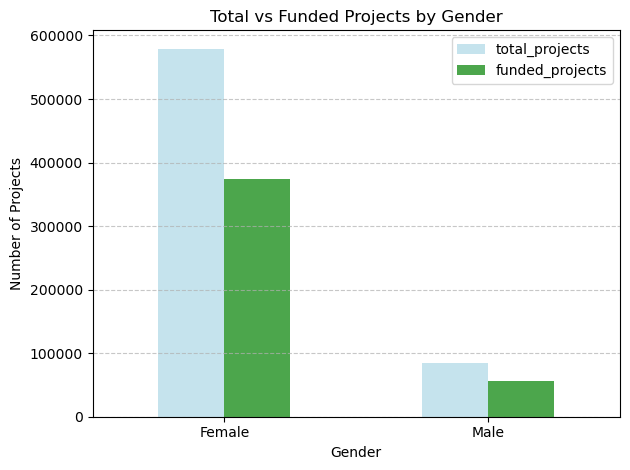

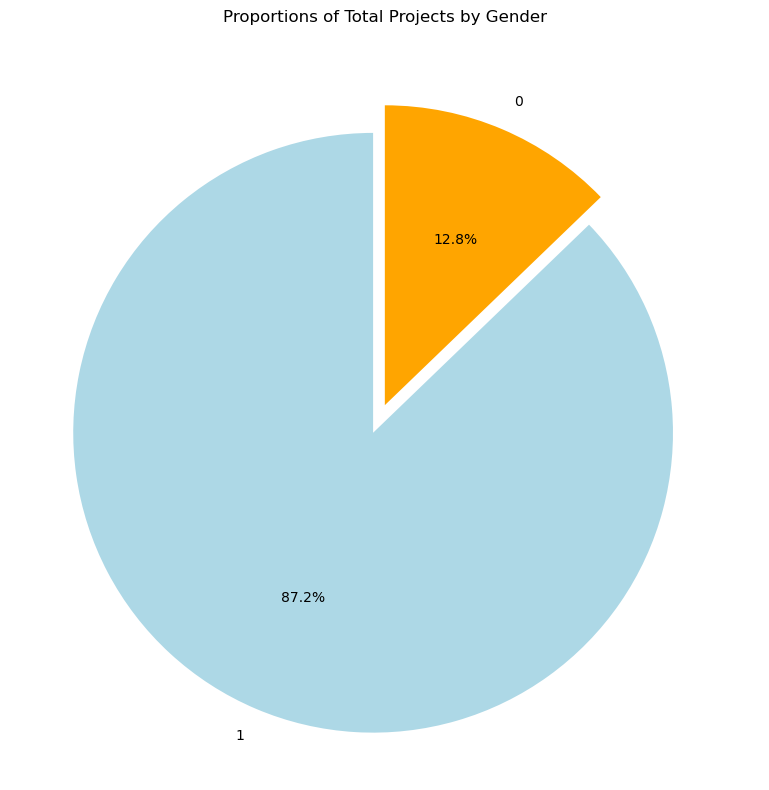

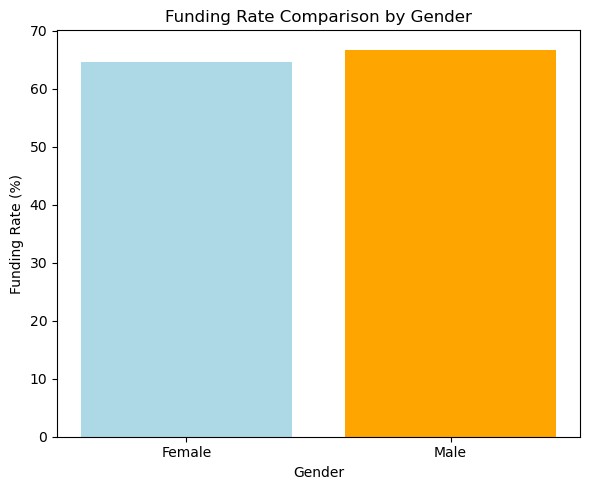

<Figure size 1000x500 with 0 Axes>

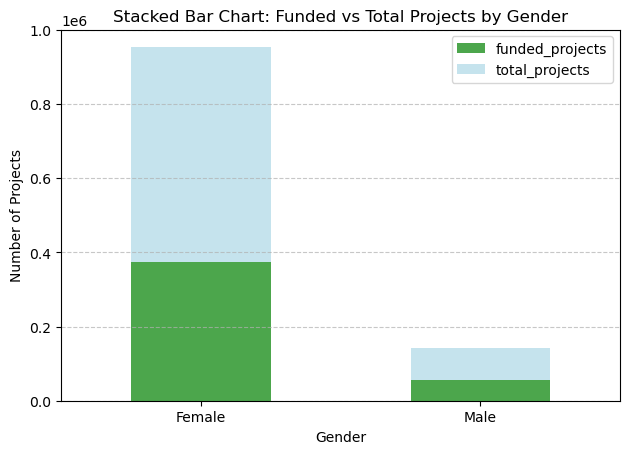

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for gender and project counts
gender_data = pd.DataFrame({
    'gender': [1, 0],  # 1 = Female, 0 = Male
    'total_projects': [579112, 84968],  # Total projects by gender
    'funded_projects': [373934, 56737],  # Funded projects by gender
})

# Calculate funding rate for each gender
gender_data['funding_rate'] = (gender_data['funded_projects'] / gender_data['total_projects']) * 100

# 1. Bar Chart for Total vs Funded Projects by Gender
plt.figure(figsize=(10, 5))
gender_data.set_index('gender')[['total_projects', 'funded_projects']].plot(kind='bar', color=['lightblue', 'green'], alpha=0.7)
plt.title('Total vs Funded Projects by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Projects')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Pie Chart for Proportions of Projects by Gender
plt.figure(figsize=(8, 8))
gender_data.set_index('gender')['total_projects'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'], explode=[0.1, 0])
plt.title('Proportions of Total Projects by Gender')
plt.ylabel('')  # Hide the default y-label for the pie chart
plt.tight_layout()
plt.show()

# 3. Funding Rate Comparison Bar Chart by Gender
plt.figure(figsize=(6, 5))
plt.bar(['Female', 'Male'], gender_data['funding_rate'], color=['lightblue', 'orange'])
plt.title('Funding Rate Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Funding Rate (%)')
plt.tight_layout()
plt.show()

# 4. Stacked Bar Chart for Funded vs Total Projects by Gender
plt.figure(figsize=(10, 5))
gender_data.set_index('gender')[['funded_projects', 'total_projects']].plot(kind='bar', stacked=True, color=['green', 'lightblue'], alpha=0.7)
plt.title('Stacked Bar Chart: Funded vs Total Projects by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Projects')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

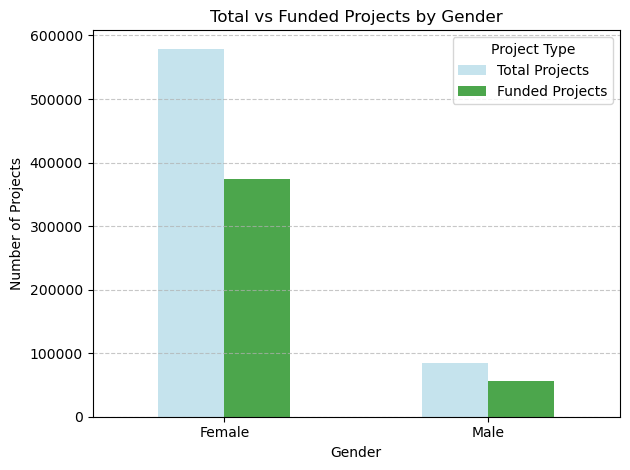

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for gender and project counts
gender_data = pd.DataFrame({
    'gender': [1, 0],  # 1 = Female, 0 = Male
    'total_projects': [579112, 84968],  # Total projects by gender
    'funded_projects': [373934, 56737],  # Funded projects by gender
})

# 1. Bar Chart for Total vs Funded Projects by Gender
plt.figure(figsize=(10, 5))
ax = gender_data.set_index('gender')[['total_projects', 'funded_projects']].plot(kind='bar', color=['lightblue', 'green'], alpha=0.7)

# Rename legend labels
ax.legend(['Total Projects', 'Funded Projects'], title="Project Type")

# Customize the plot
plt.title('Total vs Funded Projects by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Projects')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
# Total projects by gender
total_projects_by_gender = project_df["gender"].value_counts()

# Total funded projects (fully funded) by gender
funded_projects = project_df[project_df["fully_funded"] == "t"]
funded_projects_by_gender = funded_projects["gender"].value_counts()

# Calculate funding rates by gender
funding_rate_by_gender = (funded_projects_by_gender / total_projects_by_gender) * 100

# Display the results
print("Total projects by gender:")
print(total_projects_by_gender)

print("\nTotal funded projects by gender:")
print(funded_projects_by_gender)

print("\nFunding rates by gender (%):")
print(funding_rate_by_gender)


Total projects by gender:
gender
1    579112
0     84968
Name: count, dtype: int64

Total funded projects by gender:
gender
1    373934
0     56737
Name: count, dtype: int64

Funding rates by gender (%):
gender
1    64.570239
0    66.774550
Name: count, dtype: float64


Total highest poverty projects: 664080
Underfunded highest poverty projects: 233409
Proportion of underfunded highest poverty projects: 35.15%


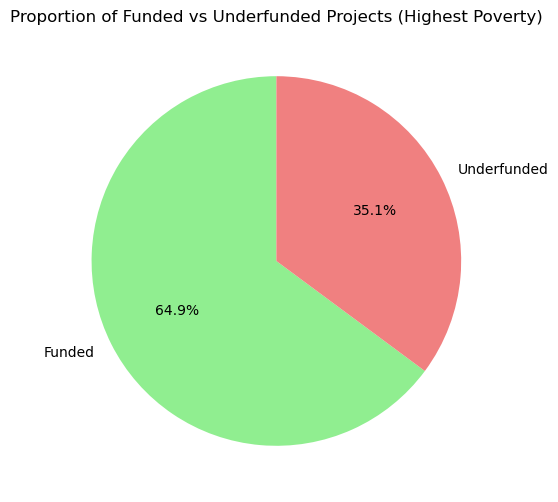

In [38]:
# Count the total number of highest poverty projects
total_highest_poverty_projects = len(project_df)

# Count the number of underfunded highest poverty projects
underfunded_highest_poverty = len(project_df[project_df["fully_funded"] == "f"])

# Calculate the proportion of underfunded projects within the highest poverty group
proportion_underfunded_highest_poverty = underfunded_highest_poverty / total_highest_poverty_projects

# Display the results
print(f"Total highest poverty projects: {total_highest_poverty_projects}")
print(f"Underfunded highest poverty projects: {underfunded_highest_poverty}")
print(f"Proportion of underfunded highest poverty projects: {proportion_underfunded_highest_poverty:.2%}")

# Visualize results
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Funded', 'Underfunded']
sizes = [
    total_highest_poverty_projects - underfunded_highest_poverty, 
    underfunded_highest_poverty
]
colors = ['lightgreen', 'lightcoral']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Funded vs Underfunded Projects (Highest Poverty)')
plt.show()


In [26]:
# Total number of projects in the dataset (across all poverty levels)
total_projects = len(outcomes_df)

# Total number of underfunded projects in the dataset
total_underfunded_projects = len(outcomes_df[outcomes_df["fully_funded"] == "f"])

# Total number of highest poverty projects
total_highest_poverty_projects = len(project_df)

# Total number of underfunded highest poverty projects
underfunded_highest_poverty = len(project_df[project_df["fully_funded"] == "f"])

# Proportion of all projects that are from highest poverty areas
proportion_highest_poverty_projects = total_highest_poverty_projects / total_projects

# Proportion of underfunded projects that are from highest poverty areas
proportion_underfunded_highest_poverty = underfunded_highest_poverty / total_underfunded_projects

# Display results
print(f"Total projects: {total_projects}")
print(f"Total underfunded projects: {total_underfunded_projects}")
print(f"Proportion of all projects from highest poverty areas: {proportion_highest_poverty_projects:.2%}")
print(f"Proportion of underfunded projects from highest poverty areas: {proportion_underfunded_highest_poverty:.2%}")


Total projects: 619326
Total underfunded projects: 188643
Proportion of all projects from highest poverty areas: 61.92%
Proportion of underfunded projects from highest poverty areas: 65.32%


In [27]:
len(project_df)


383482

In [17]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383482 entries, 0 to 383481
Data columns (total 5 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   projectid                               383482 non-null  object 
 1   total_price_excluding_optional_support  383482 non-null  float64
 2   date_posted                             383482 non-null  object 
 3   gender                                  383482 non-null  int64  
 4   fully_funded                            383482 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.6+ MB


In [18]:
# project_df preparation
project_df["date_posted"]=pd.to_datetime(project_df["date_posted"])
project_df["week"] = 0
dataframes = [project_df.copy()]
for week_shift in range(1, 5):
    # Duplicate DataFrame
    temp_df = project_df.copy()
    # Shift the date_posted column by month_shift months
    temp_df["date_posted"] = temp_df["date_posted"] + pd.DateOffset(months=week_shift)
    # Set the month column to the current shift
    temp_df["week"] = week_shift
    # Append the shifted DataFrame to the list
    dataframes.append(temp_df)
project_df_combined = pd.concat(dataframes, ignore_index=True)

In [19]:
# donation_df preparation
donation_df["donation_timestamp"]= pd.to_datetime(donation_df["donation_timestamp"].astype(str).str[:10]).dt.date
donation_df=donation_df[["projectid","donation_timestamp","donation_to_project"]]
df = pd.merge(project_df_combined, donation_df, on="projectid", how="left")
df["donation_to_project"]=df["donation_to_project"].fillna(0)

df.loc[(df['week'] == 0) & (df['donation_timestamp'].notna()) & (df['donation_timestamp'] < df['date_posted']), "donation_timestamp"] = df["date_posted"]


In [14]:
# project that don't have any donation df.donation_timestamp.isnull()
# ((df.donation_timestamp>= df.date_posted) & 
# (df.donation_timestamp< df.date_posted + pd.DateOffset(week=1)))

intermedia = df[(df.donation_timestamp.isnull()) | ((df.donation_timestamp<= df.date_posted) & (df.donation_timestamp > df.date_posted - pd.DateOffset(months=1)))]

intermedia = intermedia.groupby(["projectid","week"]).sum("donation_to_project").reset_index()[["projectid","week","donation_to_project"]]


In [15]:
project_time_series = pd.merge(project_df_combined, intermedia, on=["projectid","week"], how="left")
project_time_series["donation_to_project"]=project_time_series["donation_to_project"].fillna(0)

In [16]:
project_time_series=project_time_series.sort_values(by=['projectid', 'week'])

In [17]:
project_time_series["donation_sum"]= project_time_series.groupby('projectid')['donation_to_project'].cumsum()

In [18]:
project_time_series["percentage complete"]=project_time_series['donation_sum']/project_time_series['total_price_excluding_optional_support']





In [19]:
project_time_series[(project_time_series["percentage complete"]>=1)&(project_time_series["fully_funded"]=="t")].projectid.nunique()










221414

In [20]:
project_finish_time=project_time_series[(project_time_series["percentage complete"]>=1)&(project_time_series["fully_funded"]=="t")].groupby("projectid")["week"].min().reset_index().week.to_list()


In [169]:
# there are 45 project that was donated but did not recieved the fund so mark as F -> we change it to T
#(project_time_series["percentage complete"]>1)&

#project_time_series[(project_time_series["percentage complete"]>1) & (project_time_series["fully_funded"]=="f")]["projectid"].nunique()

In [21]:
len(project_finish_time)

221414

In [22]:
month_distribution=project_time_series[project_time_series["percentage complete"]>=1].groupby("projectid")["week"].min().reset_index().week.value_counts().reset_index()[:8]

month_distribution["sum"]=sum(month_distribution["count"])

month_distribution["percentage"]=month_distribution["count"]/month_distribution["sum"]



# 97 percent of project is funded in 5 month


In [23]:
month_distribution

,week,count,sum,percentage
0,1,117288,221448,0.529641
1,2,45701,221448,0.206374
2,3,28833,221448,0.130202
3,4,22349,221448,0.100922
4,0,7277,221448,0.032861


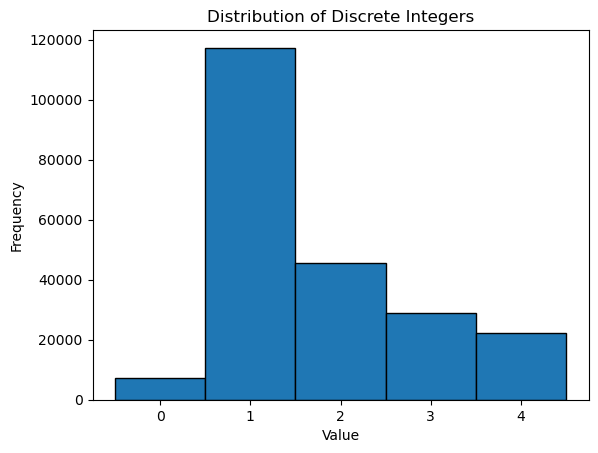

In [24]:
data = [int(x) for x in project_finish_time]
plt.hist(data, bins=range(min(data), max(data) + 2), edgecolor='black', align='left')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Discrete Integers')
plt.show()

In [25]:

project_TS_NFF = project_time_series[(project_time_series["percentage complete"]<1)& (project_time_series["week"]<=4)]





In [176]:
project_TS_NFF

,projectid,total_price_excluding_optional_support,date_posted,gender,fully_funded,week,donation_to_project,donation_sum,percentage complete
81529,00001ccc0e81598c4bd86bacb94d7acb,1273.82,2013-04-14,1,t,0,0.0,0.0,0.000000
465011,00001ccc0e81598c4bd86bacb94d7acb,1273.82,2013-05-14,1,t,1,8.5,8.5,0.006673
241035,00002bff514104264a6b798356fdd893,477.32,2010-09-08,1,t,0,0.0,0.0,0.000000
624517,00002bff514104264a6b798356fdd893,477.32,2010-10-08,1,t,1,0.0,0.0,0.000000
1007999,00002bff514104264a6b798356fdd893,477.32,2010-11-08,1,t,2,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
192973,ffffac55ee02a49d1abc87ba6fc61135,207.43,2011-06-11,1,t,0,0.0,0.0,0.000000
576455,ffffac55ee02a49d1abc87ba6fc61135,207.43,2011-07-11,1,t,1,0.0,0.0,0.000000
959937,ffffac55ee02a49d1abc87ba6fc61135,207.43,2011-08-11,1,t,2,0.0,0.0,0.000000
1343419,ffffac55ee02a49d1abc87ba6fc61135,207.43,2011-09-11,1,t,3,92.5,92.5,0.445934


In [26]:
col =["projectid","school_longitude","school_latitude", 'teacher_teach_for_america',
      'resource_type', "primary_focus_subject", "primary_focus_area","grade_level",
        "eligible_double_your_impact_match","eligible_almost_home_match","school_charter","school_magnet","school_year_round","school_nlns","school_kipp","school_charter_ready_promise"]
project_attribute=project[col]
binary_col=["teacher_teach_for_america","eligible_double_your_impact_match","eligible_almost_home_match","school_charter","school_magnet","school_year_round","school_nlns","school_kipp","school_charter_ready_promise"]
project_attribute[binary_col] = project_attribute[binary_col].replace({'t': 1, 'f': 0})
project_attribute = pd.get_dummies(project_attribute, columns=['primary_focus_subject', 
                                        'primary_focus_area', 
                                        'resource_type','grade_level'])
project_TS_NFF=pd.merge(project_TS_NFF,project_attribute, on="projectid", how="left")

project_TS_NFF.info()






C:\Users\baigd\AppData\Local\Temp\ipykernel_22128\1677917068.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  project_attribute[binary_col] = project_attribute[binary_col].replace({'t': 1, 'f': 0})
C:\Users\baigd\AppData\Local\Temp\ipykernel_22128\1677917068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_attribute[binary_col] = project_attribute[binary_col].replace({'t': 1, 'f': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193816 entries, 0 to 1193815
Data columns (total 64 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   projectid                                    1193816 non-null  object        
 1   total_price_excluding_optional_support       1193816 non-null  float64       
 2   date_posted                                  1193816 non-null  datetime64[ns]
 3   gender                                       1193816 non-null  int64         
 4   fully_funded                                 1193816 non-null  object        
 5   week                                         1193816 non-null  int64         
 6   donation_to_project                          1193816 non-null  float64       
 7   donation_sum                                 1193816 non-null  float64       
 8   percentage complete                          1193816

In [27]:
project_TS_NFF["month"]=project_TS_NFF.date_posted.dt.month



In [28]:
project_TS_NFF["fully_funded"]=project_TS_NFF["fully_funded"].map({"t":0, "f":1})
project_TS_NFF= project_TS_NFF.rename(columns={'fully_funded': 'not_funded'})



In [29]:
project_TS_NFF.not_funded.value_counts()


not_funded
1    614959
0    578857
Name: count, dtype: int64

In [30]:
project_TS_NFF["group"]=pd.qcut(project_TS_NFF['date_posted'].rank(method='first'), q=5,labels=False)
project_TS_NFF.groupby("group").agg({"date_posted":["min","max"]})


date_posted           
              min        max
group                       
0      2002-09-13 2008-12-21
1      2008-12-21 2010-12-02
2      2010-12-02 2012-03-11
3      2012-03-11 2013-09-02
4      2013-09-02 2014-09-12

In [31]:
project_TS_NFF.shape


(1193816, 66)

In [32]:
not_training_col=['projectid','date_posted','not_funded','donation_to_project','donation_sum','group']

results = []

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    #('SVC', SVC(probability=True)),
    ('Random Forest', RandomForestClassifier())
]



# Cross-validation over the specified groups
for i in range(4):
    print(i)
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] > i].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] > i]["not_funded"]

    # Iterate over each model
    for name, model in models:
        print(name)
        # Train the model
        model.fit(trainX, trainY)
        # Make predictions
        predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
        probas = model.predict_proba(testX)[:, 1]
        # Compute performance metrics
        accuracy = accuracy_score(testY, predictions)
        precision = precision_score(testY, predictions)
        recall = recall_score(testY, predictions)
        f1 = f1_score(testY, predictions)
        auc = roc_auc_score(testY, probas)
        # Append the results
        results.append({
            'fold': i,
            'model': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc,
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)
    
    

0
Logistic Regression


c:\Users\baigd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
results_df

In [33]:

###  LR model for gender bias ###

not_training_col = ['projectid', 'date_posted', 'not_funded', 'donation_to_project', 'donation_sum', 'group']
results = []

# Define the Logistic Regression model pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Cross-validation over the specified groups
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] == i + 1].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] == i + 1]["not_funded"]
    test_gender = project_TS_NFF[project_TS_NFF["group"] == i + 1]["gender"]

    # # Use only the first 1000 rows for training
    # trainX = trainX.iloc[:1000]
    # trainY = trainY.iloc[:1000]

    print(f"Training Logistic Regression")
    # Train the model
    model.fit(trainX, trainY)
    # Make predictions
    predictions = model.predict(testX)
    # Calculate probabilities for ROC AUC
    probas = model.predict_proba(testX)[:, 1]

    # Compute overall performance metrics
    accuracy = accuracy_score(testY, predictions)
    precision = precision_score(testY, predictions, zero_division=0)
    recall = recall_score(testY, predictions, zero_division=0)
    f1 = f1_score(testY, predictions, zero_division=0)
    auc = roc_auc_score(testY, probas)
    # Append overall results
    results.append({
        'fold': i,
        'model': 'Logistic Regression',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc,
    })

    # Compute metrics for each gender
    for gender_value, gender_label in zip([1, 0], ['Female', 'Male']):
        gender_indices = (test_gender == gender_value)
        gender_testY = testY[gender_indices]
        gender_probas = probas[gender_indices]
        gender_predictions = predictions[gender_indices]

        # Compute metrics
        gender_accuracy = accuracy_score(gender_testY, gender_predictions)
        gender_precision = precision_score(gender_testY, gender_predictions, zero_division=0)
        gender_recall = recall_score(gender_testY, gender_predictions, zero_division=0)
        gender_f1 = f1_score(gender_testY, gender_predictions, zero_division=0)
        gender_auc = roc_auc_score(gender_testY, gender_probas)

        # Append gender-specific results
        results.append({
            'fold': i,
            'model': 'Logistic Regression',
            'gender': gender_label,
            'accuracy': gender_accuracy,
            'precision': gender_precision,
            'recall': gender_recall,
            'f1_score': gender_f1,
            'roc_auc': gender_auc,
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)


Fold 0
Training Logistic Regression
Fold 1
Training Logistic Regression
Fold 2
Training Logistic Regression
Fold 3
Training Logistic Regression


In [39]:
project_TS_NFF[project_TS_NFF["group"] ==  4]['gender'].value_counts()

gender
1    207771
0     30992
Name: count, dtype: int64

In [40]:
project_TS_NFF['gender'].value_counts()

gender
1    1044143
0     149673
Name: count, dtype: int64

In [207]:
results_df

,fold,model,accuracy,precision,recall,f1_score,roc_auc,gender
0,0,Logistic Regression,0.723504,0.700890,0.532349,0.605102,0.788944,NaN
1,0,Logistic Regression,0.720335,0.702617,0.535759,0.607947,0.786882,Female
2,0,Logistic Regression,0.745983,0.686181,0.504361,0.581388,0.799914,Male
3,1,Logistic Regression,0.717733,0.788614,0.550810,0.648602,0.813145,NaN
4,1,Logistic Regression,0.716788,0.786516,0.558297,0.653042,0.811361,Female
5,1,Logistic Regression,0.724384,0.807160,0.493781,0.612726,0.825475,Male
6,2,Logistic Regression,0.738653,0.777492,0.625437,0.693224,0.824035,NaN
7,2,Logistic Regression,0.737946,0.775307,0.627578,0.693664,0.822695,Female
8,2,Logistic Regression,0.743620,0.793845,0.610224,0.690028,0.834098,Male
9,3,Logistic Regression,0.745438,0.954264,0.709891,0.814135,0.891519,NaN


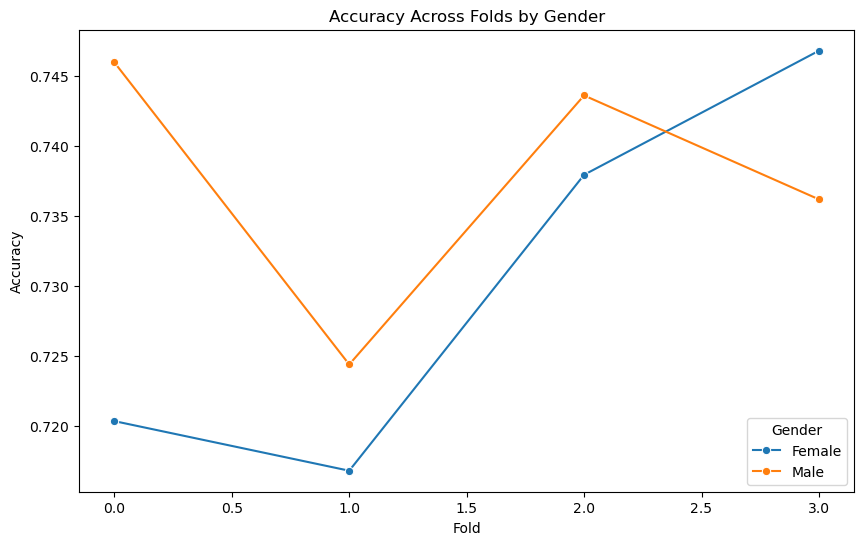

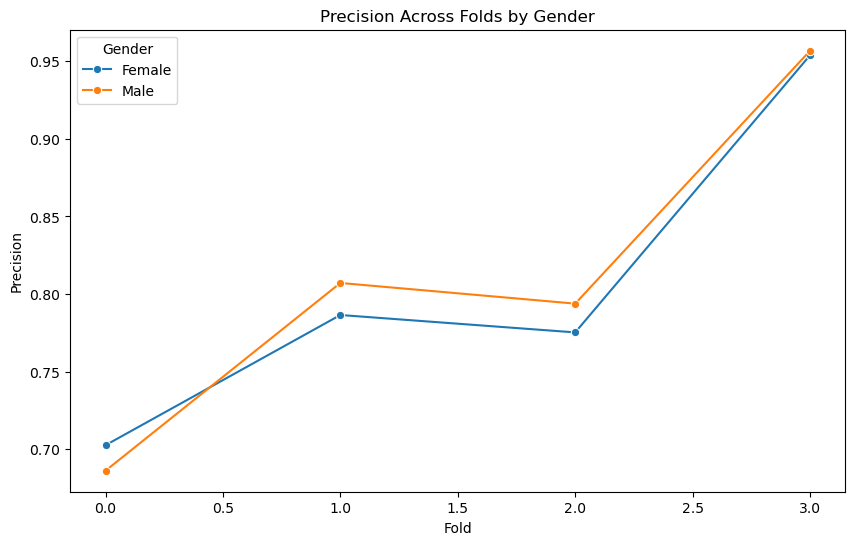

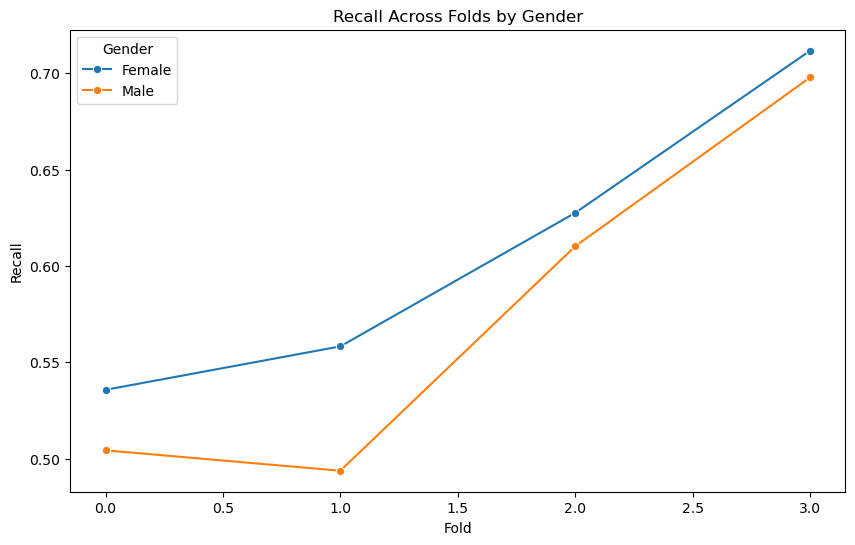

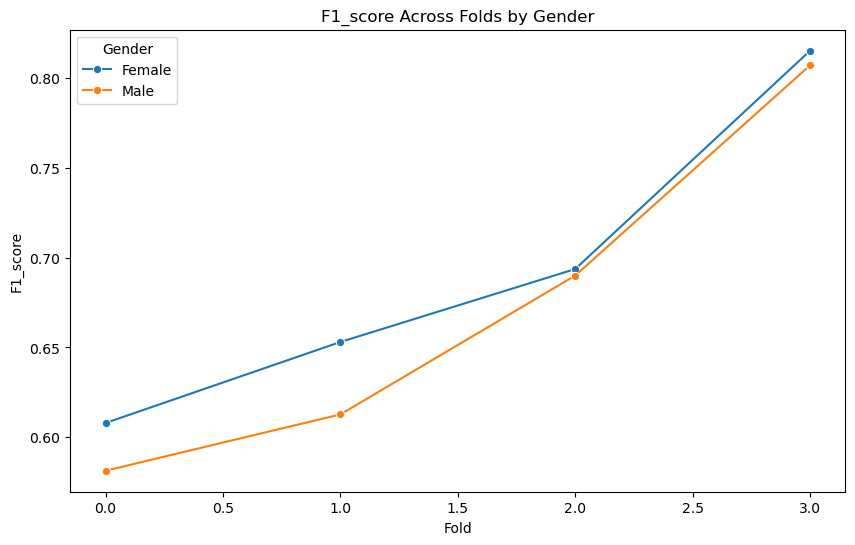

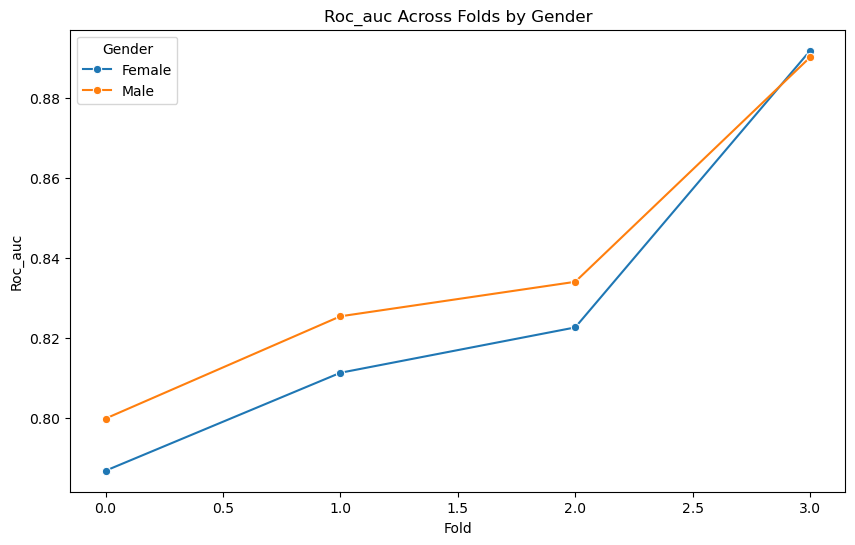

In [ ]:
### Gender bias metrics ###

data = results_df
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='fold', y=metric, hue='gender', marker='o')
    plt.title(f'{metric.capitalize()} Across Folds by Gender')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Fold')
    plt.legend(title='Gender')
    plt.show()


In [186]:
project_TS_NFF[project_TS_NFF["group"] < 1]

,projectid,total_price_excluding_optional_support,date_posted,gender,not_funded,week,donation_to_project,donation_sum,percentage complete,school_longitude,...,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,month,group
19,00014ba2b351fc0573b94828aa742bec,407.0,2008-05-27,1,0,0,0.0,0.0,0.000000,-79.398530,...,False,False,False,False,True,False,False,False,5,0
20,00014ba2b351fc0573b94828aa742bec,407.0,2008-06-27,1,0,1,0.0,0.0,0.000000,-79.398530,...,False,False,False,False,True,False,False,False,6,0
21,00014ba2b351fc0573b94828aa742bec,407.0,2008-07-27,1,0,2,50.0,50.0,0.122850,-79.398530,...,False,False,False,False,True,False,False,False,7,0
22,00014ba2b351fc0573b94828aa742bec,407.0,2008-08-27,1,0,3,17.0,67.0,0.164619,-79.398530,...,False,False,False,False,True,False,False,False,8,0
24,00029b5d84a5754432d783d2cda868e4,123.0,2003-10-09,1,0,0,0.0,0.0,0.000000,-73.889624,...,False,True,False,False,False,False,False,True,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193786,fffe426c60834b0ba2eb05f759d854da,430.0,2007-12-02,1,0,0,0.0,0.0,0.000000,-73.889624,...,False,True,False,False,False,False,False,True,12,0
1193787,fffe426c60834b0ba2eb05f759d854da,430.0,2008-01-02,1,0,1,25.5,25.5,0.059302,-73.889624,...,False,True,False,False,False,False,False,True,1,0
1193788,fffe426c60834b0ba2eb05f759d854da,430.0,2008-02-02,1,0,2,0.0,25.5,0.059302,-73.889624,...,False,True,False,False,False,False,False,True,2,0
1193789,fffe426c60834b0ba2eb05f759d854da,430.0,2008-03-02,1,0,3,100.0,125.5,0.291860,-73.889624,...,False,True,False,False,False,False,False,True,3,0


In [190]:

# Define the training columns
not_training_col=['projectid','date_posted','not_funded','donation_to_project','donation_sum','group']

results = []
num_trees = 40

# List of models to evaluate with pipelines
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Naive Bayes', GaussianNB()), 
    ('Random Forest', RandomForestClassifier(n_estimators=num_trees)) ]

# Cross-validation over the specified groups
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] == i+1].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] == i+1]["not_funded"]

    # Iterate over each model
    for name, model in models:
        print(f"Training {name}")
        # Train the model
        model.fit(trainX, trainY)
        # Make predictions
        predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(testX)[:, 1]
        else:
            probas = model.decision_function(testX)
            if len(probas.shape) > 1:
                probas = probas[:, 1]
        # Compute performance metrics
        accuracy = accuracy_score(testY, predictions)
        precision = precision_score(testY, predictions, zero_division=0)
        recall = recall_score(testY, predictions, zero_division=0)
        f1 = f1_score(testY, predictions, zero_division=0)
        auc = roc_auc_score(testY, probas)
        # Append the results
        results.append({
            'fold': i,
            'model': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc,
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

Fold 0
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 1
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 2
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 3
Training Logistic Regression
Training Naive Bayes
Training Random Forest


KeyboardInterrupt: 

In [109]:
results_df


,fold,model,accuracy,precision,recall,f1_score,roc_auc
0,0,Logistic Regression,0.667682,0.702931,0.650268,0.675575,0.728175
1,0,Random Forest,0.625141,0.694632,0.527323,0.599524,0.693355
2,1,Logistic Regression,0.664729,0.747453,0.632450,0.685159,0.734194
3,1,Random Forest,0.589300,0.744385,0.438606,0.551977,0.675207
4,2,Logistic Regression,0.667030,0.787623,0.644111,0.708675,0.739623
5,2,Random Forest,0.577034,0.774072,0.462202,0.578800,0.681289
6,3,Logistic Regression,0.666957,0.909165,0.639890,0.751124,0.779274
7,3,Random Forest,0.532442,0.903457,0.453109,0.603530,0.707718


In [110]:
not_training_col = ['projectid', 'date_posted', 'not_funded', 'donation_to_project', 'donation_sum', 'group']

results = []
num_trees = 50

# List of models to evaluate with pipelines
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=num_trees)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=num_trees))
]

# Cross-validation over the specified groups
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] == i+1].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] == i+1]["not_funded"]

    # Iterate over each model
    for name, model in models:
        print(f"Training {name}")
        # Train the model
        model.fit(trainX, trainY)
        # Make predictions
        predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(testX)[:, 1]
        else:
            probas = model.decision_function(testX)
            if len(probas.shape) > 1:
                probas = probas[:, 1]
        # Compute performance metrics
        accuracy = accuracy_score(testY, predictions)
        precision = precision_score(testY, predictions, zero_division=0)
        recall = recall_score(testY, predictions, zero_division=0)
        f1 = f1_score(testY, predictions, zero_division=0)
        auc = roc_auc_score(testY, probas)
        # Append the results
        results.append({
            'fold': i,
            'model': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc,
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

Fold 0
Training Logistic Regression


ValueError: could not convert string to float: 'Female'

In [45]:
results_df 


,fold,model,accuracy,precision,recall,f1_score,roc_auc
0,0,Logistic Regression,0.723257,0.700528,0.531943,0.604706,0.788690
1,0,Naive Bayes,0.627436,0.720700,0.104071,0.181878,0.703918
2,0,Random Forest,0.707259,0.655609,0.556845,0.602205,0.765608
3,0,Gradient Boosting,0.722876,0.660473,0.624742,0.642111,0.790203
4,1,Logistic Regression,0.717608,0.788485,0.550605,0.648416,0.813065
5,1,Naive Bayes,0.533788,0.801049,0.018933,0.036992,0.687894
6,1,Random Forest,0.713084,0.768060,0.563508,0.650073,0.802131
7,1,Gradient Boosting,0.731081,0.796892,0.578952,0.670661,0.824549
8,2,Logistic Regression,0.738343,0.777085,0.625088,0.692848,0.824032
9,2,Naive Bayes,0.534831,0.715325,0.024431,0.047249,0.723751


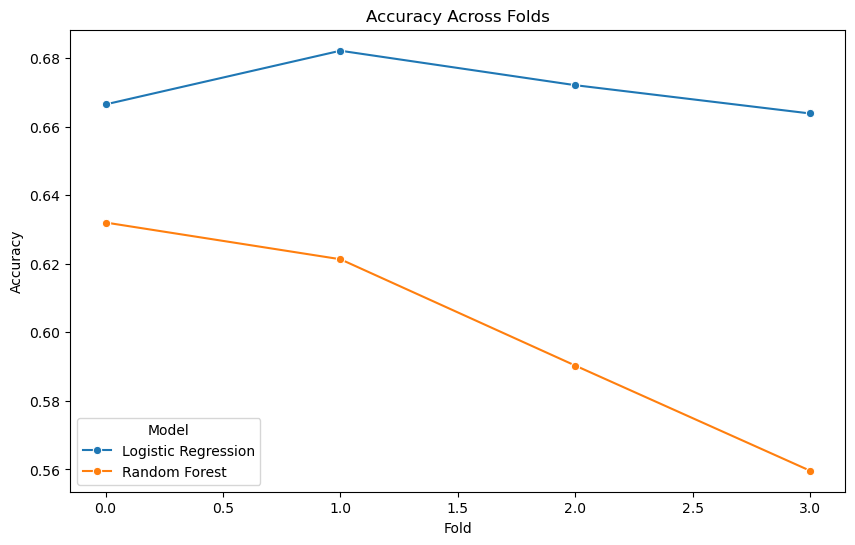

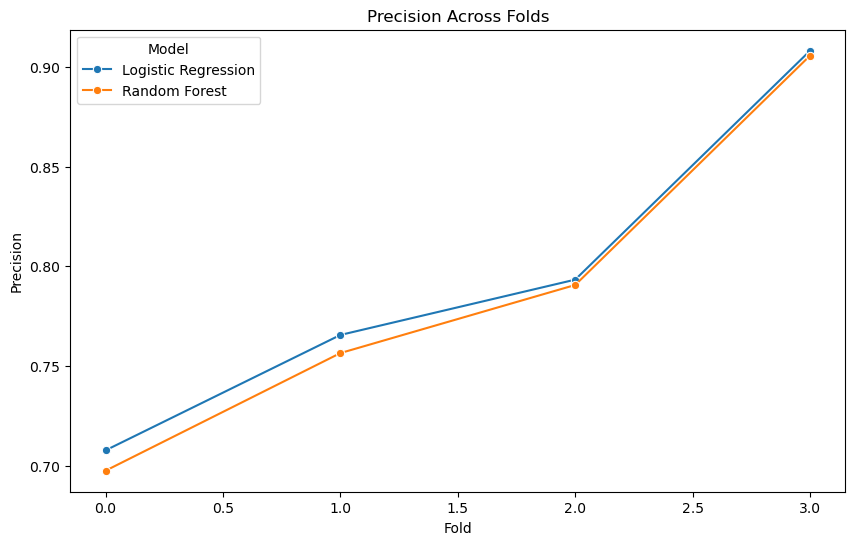

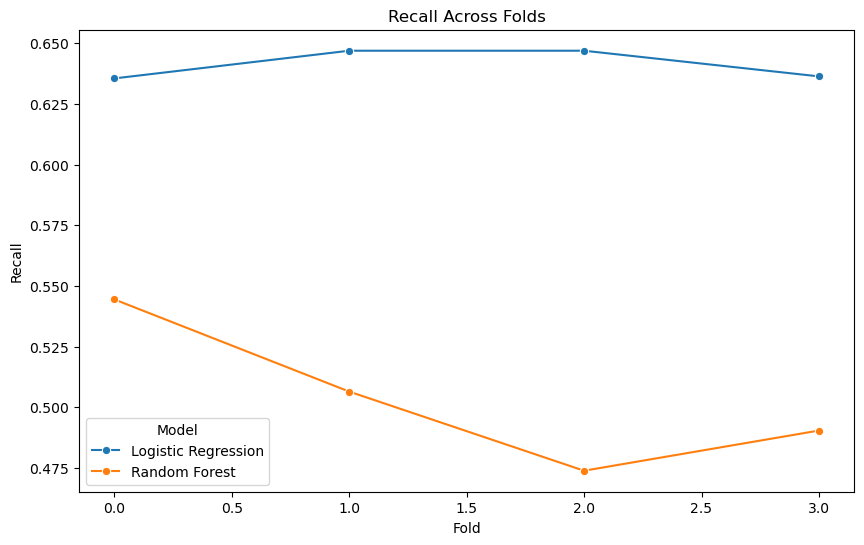

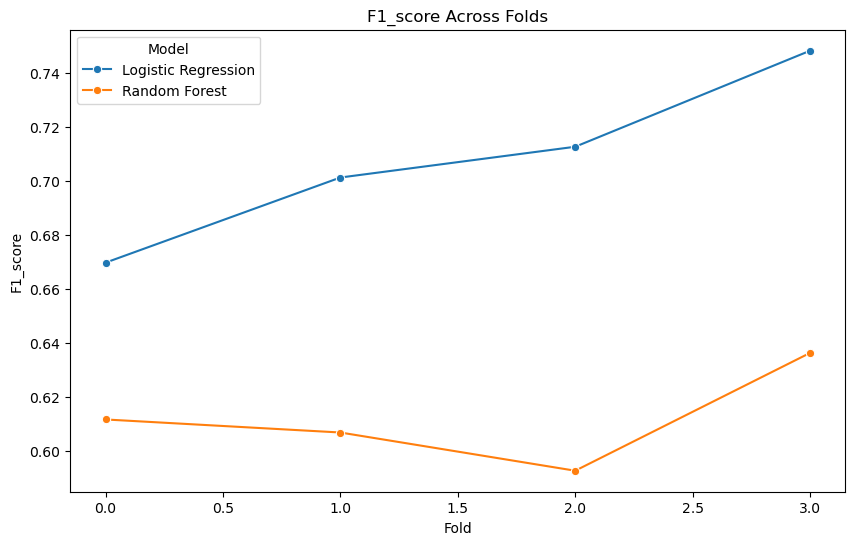

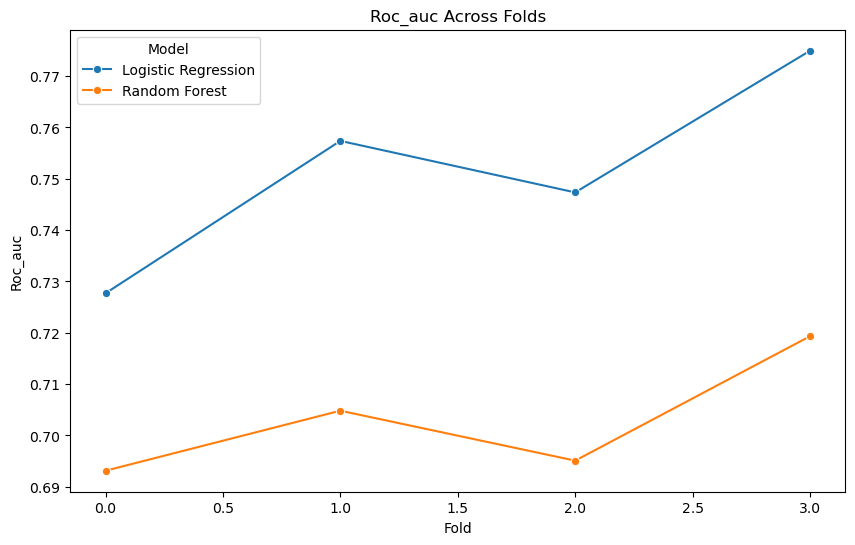

In [188]:
data = results_df
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='fold', y=metric, hue='model', marker='o')
    plt.title(f'{metric.capitalize()} Across Folds')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Fold')
    plt.legend(title='Model')
    plt.show()

In [75]:
results_df

NameError: name 'results_df' is not defined

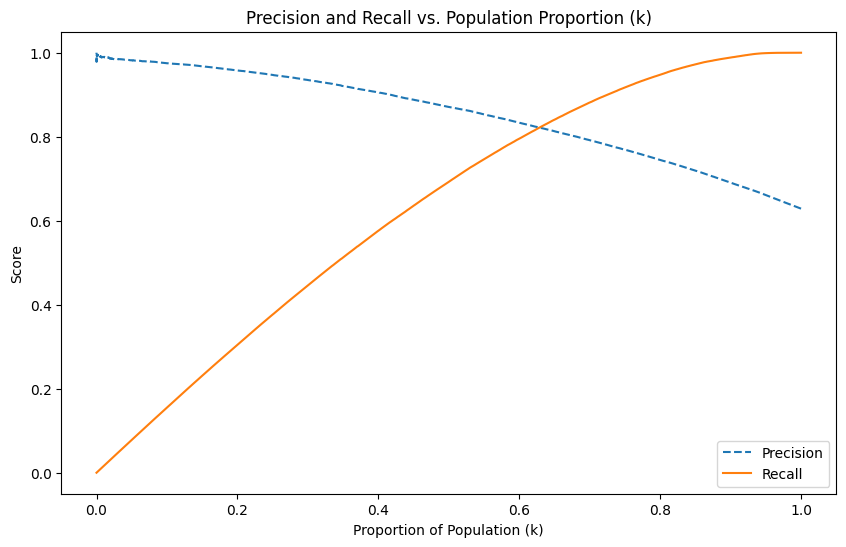

In [46]:
from sklearn.metrics import precision_recall_curve
not_training_col = ['projectid', 'date_posted', 'not_funded', 'donation_to_project', 'donation_sum', 'group']

trainX = project_TS_NFF[project_TS_NFF["group"] <= 2].drop(columns=not_training_col)
trainY = project_TS_NFF[project_TS_NFF["group"] <= 2]["not_funded"]
testX = project_TS_NFF[project_TS_NFF["group"] > 2].drop(columns=not_training_col)
testY = project_TS_NFF[project_TS_NFF["group"] > 2]["not_funded"]

model= GradientBoostingClassifier(n_estimators=50)


        # Train the model
model.fit(trainX, trainY)
        # Make predictions
predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
probabilities = model.predict_proba(testX)[:, 1]

# Get precision, recall, and thresholds for precision-recall curve
precision, recall, thresholds = precision_recall_curve(testY, probabilities)

# Calculate the proportion of population (k) at each threshold
population_proportion = np.array([np.mean(probabilities >= t) for t in thresholds])

# Plot Precision-Recall vs. Proportion of Population
plt.figure(figsize=(10, 6))
plt.plot(population_proportion[1:], precision[:-1][1:], label="Precision", linestyle='--')
plt.plot(population_proportion, recall[:-1], label="Recall", linestyle='-')
plt.xlabel("Proportion of Population (k)")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Population Proportion (k)")
plt.legend(loc="best")
plt.show()


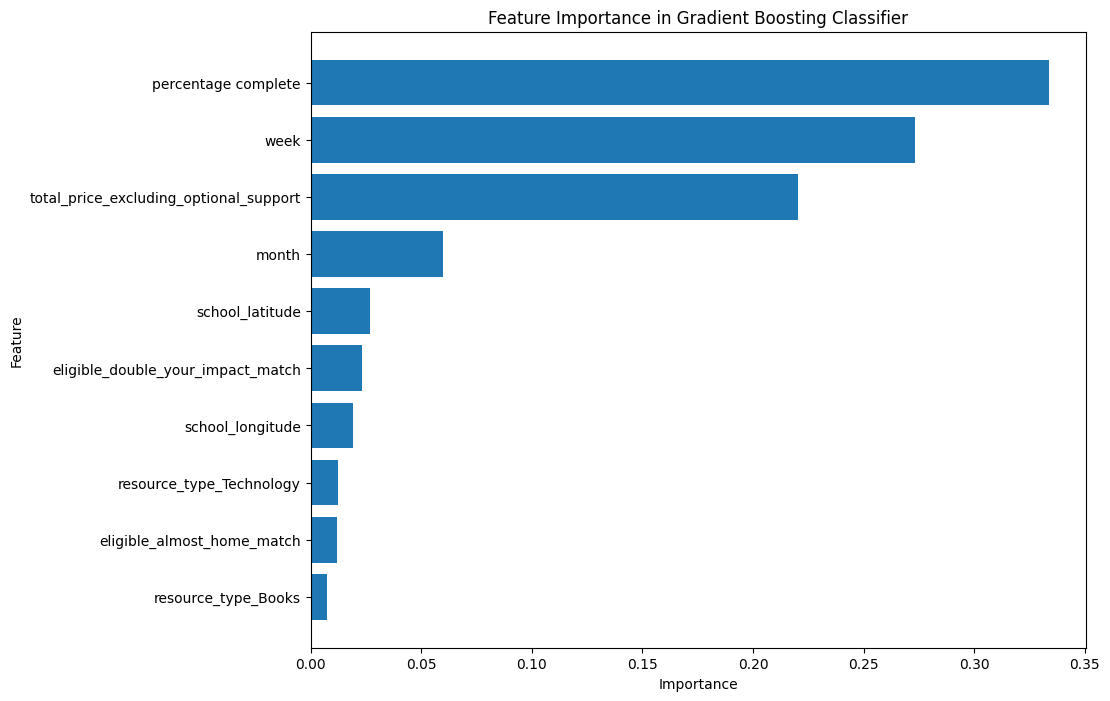

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Assuming your model is already trained as per your code
# Extract feature importances
feature_importances = model.feature_importances_

# Get feature names from the training data
feature_names = trainX.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.gca().invert_yaxis()
plt.show()

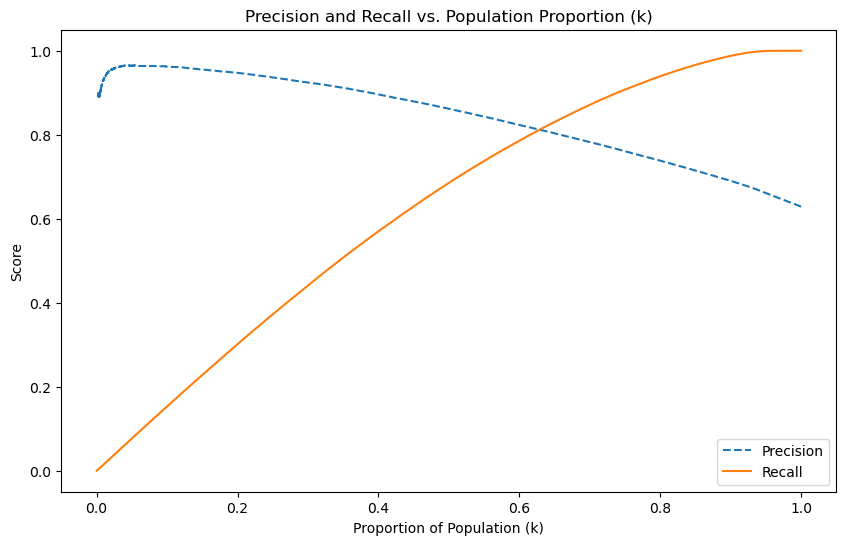

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(population_proportion[:-1000], precision[:-1][:-1000], label="Precision", linestyle='--')
plt.plot(population_proportion, recall[:-1], label="Recall", linestyle='-')
plt.xlabel("Proportion of Population (k)")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Population Proportion (k)")
plt.legend(loc="best")
plt.show()

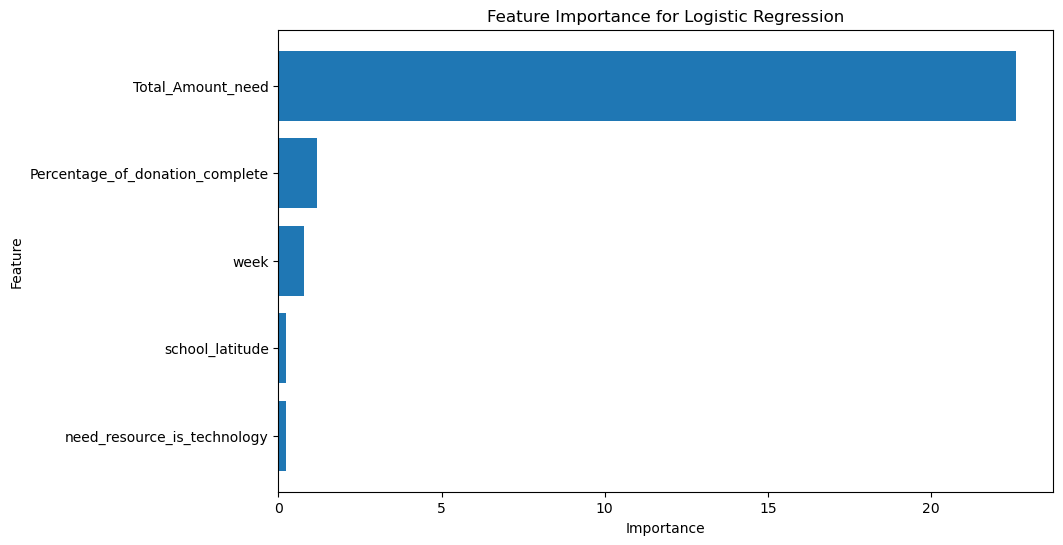

In [78]:
feature_importance = np.abs(model.named_steps['classifier'].coef_[0])  # Coefficients for each feature
features = trainX.columns if hasattr(trainX, 'columns') else np.arange(trainX.shape[1])

# Pair feature names with their importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(["Total_Amount_need","Percentage_of_donation_complete","week","school_latitude","need_resource_is_technology" ], importance_df['Importance'][:5], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [71]:
importance_df

,Feature,Importance
0,total_price_excluding_optional_support,22.621514
1,week,0.782815
45,resource_type_Technology,0.220732
38,primary_focus_area_Literacy & Language,0.108692
23,primary_focus_subject_Literacy,0.071700
48,grade_level_Grades 3-5,0.067166
43,resource_type_Other,0.067114
49,grade_level_Grades 6-8,0.064031
51,grade_level_Grades PreK-2,0.062516
24,primary_focus_subject_Literature & Writing,0.054973


In [8]:
col = [ 'school_charter', 'school_magnet', 
       'school_year_round', 'school_nlns','school_kipp','school_charter_ready_promise',
        'teacher_teach_for_america', 'eligible_double_your_impact_match', 
       'eligible_almost_home_match']

df[col] = df[col].replace({'t': 1, 'f': 0})

/var/folders/1q/1dhz5r390wl8yb3wp_lwrdgm0000gn/T/ipykernel_87119/713502600.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'t': 1, 'f': 0})


In [9]:
print(df.dtypes)

school_latitude                           float64
school_longitude                          float64
school_charter                              int64
school_magnet                               int64
school_year_round                           int64
school_nlns                                 int64
school_kipp                                 int64
school_charter_ready_promise                int64
teacher_prefix                             object
teacher_teach_for_america                   int64
teacher_ny_teaching_fellow                  int64
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object
grade_level                                object
total_price_excluding_optional_support    float64
students_reached                          float64


In [10]:
df_encoded = pd.get_dummies(df, columns=['primary_focus_subject', 
                                         'primary_focus_area', 'grade_level','teacher_prefix',
                                         'resource_type','poverty_level','grade_level',"secondary_focus_subject",
                                         "secondary_focus_area"])

In [11]:
print(df_encoded.dtypes)

school_latitude                             float64
school_longitude                            float64
school_charter                                int64
school_magnet                                 int64
school_year_round                             int64
                                             ...   
secondary_focus_area_History & Civics          bool
secondary_focus_area_Literacy & Language       bool
secondary_focus_area_Math & Science            bool
secondary_focus_area_Music & The Arts          bool
secondary_focus_area_Special Needs             bool
Length: 105, dtype: object


In [12]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
X_norm = preprocessing.normalize(df_encoded)
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_norm)

In [13]:
K = range(2,8)
fits = []
score = []


for k in K:
    print(k)
    model = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=1024, n_init='auto').fit(X_reduced)
    fits.append(model)
    score.append(silhouette_score(X_reduced, model.labels_, metric='euclidean'))

2
3
4
5
6
7


/Users/jasonsun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jasonsun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

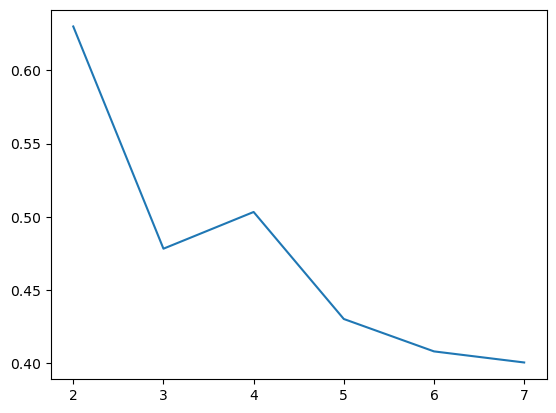

In [14]:
import seaborn as sns
sns.lineplot(x = K, y = score)

In [ ]:
df=pd.read_csv("essays.csv")

In [15]:
score


[0.6299388602288594,
 0.47814334042823237,
 0.5032197672925712,
 0.43011509829721173,
 0.40798687919655413,
 0.4004148502161258]

In [ ]:
df_stats=df.groupby("donor_acctid").size()

In [ ]:
df_stats.reset_index(name="count")["count"].value_counts()